[(10, 3), (10, 12), (3, 6), (14, 9), (4, 8)]


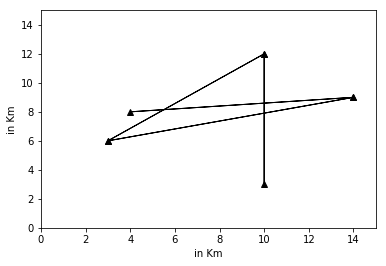

In [61]:
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../model')

# user made models
import host
import package
import router
import utils

## AREA DESCRIPTION ##

hosts_quantity = 5

# values below corresponds to a measurement in kilometers
width = 15
height = 15

# get arrays containing coordinates
x, y = utils.generate_coordinates(hosts_quantity, width, height)

lista = []
for i in range(len(x)):
    lista.append((x[i],y[i]))

print(lista)

# figure dimensions
plt.axis([0, width, 0, height])

    # figure labels
plt.xlabel("in Km")
plt.ylabel("in Km")

for i in range(len(lista)-1):
    if(i<=len(lista)):
        
        plt.plot(lista[i][0], lista[i][1], 'k^')       

        # plotting the path from actual host to the next host
        plt.arrow(lista[i][0], lista[i][1], lista[i+1][0] - lista[i][0], lista[i+1][1] - lista[i][1])
    
    plt.plot(lista[i+1][0], lista[i+1][1], 'k^')
    
plt.show()

# static host positions for testing purposes
# x = [1, 5, 6, 9]
# y = [1, 6, 3, 5]

# # figure dimensions
# plt.axis([0, width, 0, height])

# # figure labels
# plt.xlabel("in Km")
# plt.ylabel("in Km")

# # plotting triangles
# plt.plot(x, y, 'k^')

# # plotting hosts names
# for i in range(hosts_quantity):
#     plt.annotate(i, (x[i]+0.1, y[i]+0.1))

# # plotting estimated area coverage
# plt.scatter(x, y, s=25000, alpha=0.1)

# # plt.arrow(x[1], y[1], x[2]-x[1], y[2]-y[1])

plt.show()